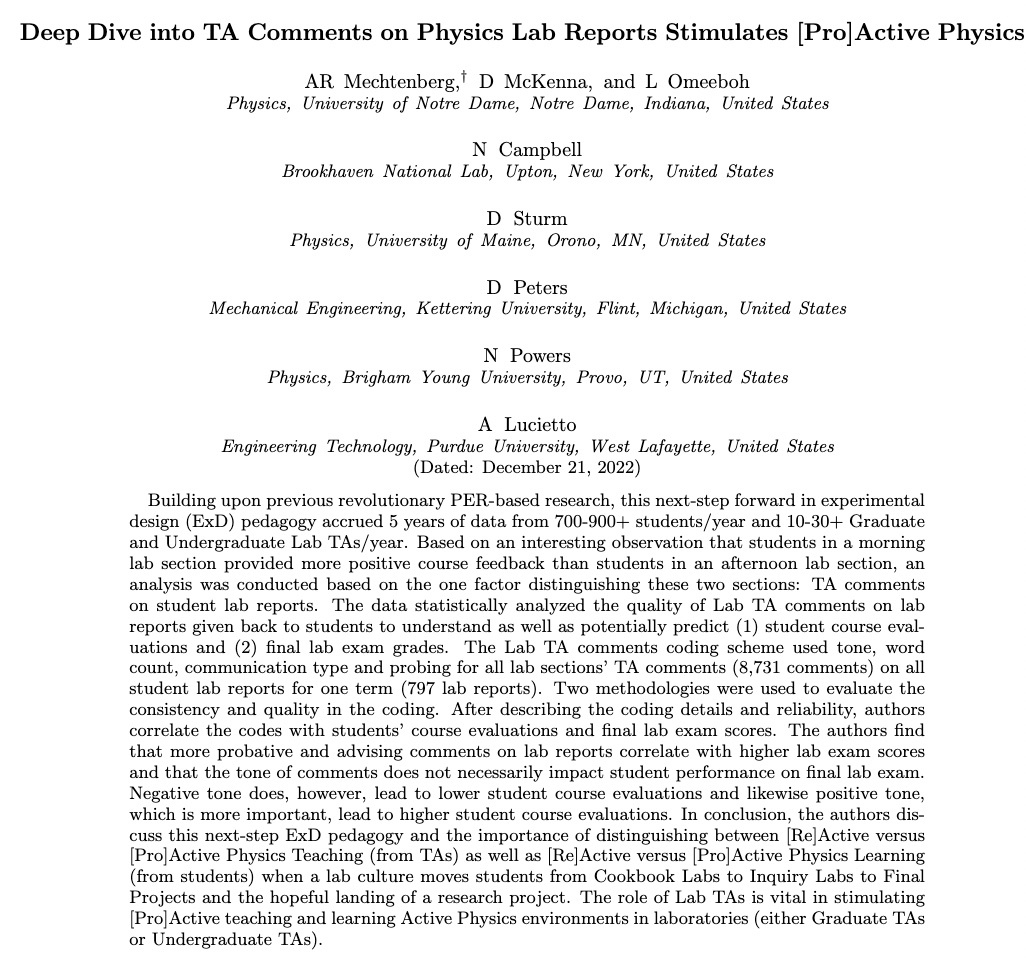

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.gridspec as gridspec
from scipy import stats, integrate
from scipy.optimize import curve_fit
#import uncertainties.unumpy as unp
#import uncertainties as unc
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
from pandas import DataFrame
import math
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import google.colab

from __future__ import print_function
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)

In [2]:
!git clone https://github.com/abigailmechtenberg/APS-PRPER-ExD.git

Cloning into 'APS-PRPER-ExD'...
remote: Enumerating objects: 289, done.
remote: Counting objects: 100% (280/280), done.
remote: Compressing objects: 100% (231/231), done.
remote: Total 289 (delta 137), reused 122 (delta 47), pack-reused 9 (from 1)
Receiving objects: 100% (289/289), 25.11 MiB | 17.02 MiB/s, done.
Resolving deltas: 100% (137/137), done.


In [3]:
%cd APS-PRPER-ExD

!git pull

/content/APS-PRPER-ExD
Already up to date.


In [4]:
from pathlib import Path

path_to_colab = Path("/content/APS-PRPER-ExD")

In [5]:
# Data for a single PreMed Lab term with 8,731 comments on 797 lab reports by Lab TAs.
# Data includes Class (C), lab Section (S),
# Student Group submitting lab reports (Grp), and Lab TA who wrote comment (TA),
# C+S+Grp is Lab Report Comments by Class, Student, and Group
# C+S+TA is Lab Report Comments by Class, Student, and Lab TA
# Lab Report number (Labnum),
# Word Count of a specific lab report comment (Word Count),
# Tone of a specific lab report comment (Tone),
# Complexity of a specific lab report comment (Complexity),
# Probative of a specific lab report comment (Probative),
# Judging versus Advising evaluation of a specific lab report comment by a Lab TA (JATA)
# CIF is for students' lab course instructor feedback at institution
# FE-Exam is for Physics Lab 1 students' lab final exam (Physics 2 did an extensive
# final lab project and no lab final exam)

data_group1_df = pd.read_excel(path_to_colab / 'Paper_1/data_group1.xlsx', header = 0,sheet_name = 'Sheet1')
data_group1_np = data_group1_df.to_numpy()

# print(data_group1_df.head()) # delete comment to see data
# print(data_group1_np)        # delete comment to see data

data_group2_df = pd.read_excel(path_to_colab / 'Paper_1/data_group2.xlsx', header = 0,sheet_name = 'Sheet1')
data_group2_np = data_group2_df.to_numpy()

# print(data_group2_df.head())  # delete comment to see data
# print(data_group2_np)         # delete comment to see data

data_group3_df = pd.read_excel(path_to_colab / 'Paper_1/data_group3.xlsx', header = 0,sheet_name = 'Sheet1')
data_group3_np = data_group3_df.to_numpy()

# print(data_group3_df.head())  # delete comment to see data
# print(data_group3_np)         # delete comment to see data

In [6]:
Tone = data_group2_df['Tone']
Word_Count = data_group2_df['Word Count']
Complexity = data_group2_df['Complexity']
Probative = data_group2_df['Probative']
CIF = data_group2_df['CIF']

Tone_stdev = data_group2_df['Tone_STDEV']
Word_Count_stdev = data_group2_df['WC_STDEV']
Complexity_stdev = data_group2_df['Complexity_STDEV']
Probative_stdev = data_group2_df['Probative_STDEV']
CIF_stdev = data_group2_df['CIF_STDEV']

Tone_sterr = data_group2_df['Tone_STERR']
Word_Count_sterr = data_group2_df['WC_STERR']
Complexity_sterr = data_group2_df['Complexity_STERR']
Probative_sterr = data_group2_df['Probative_STERR']
CIF_sterr = data_group2_df['CIF_STERR']

Tone_COUNT = data_group2_df['Tone_Count']
Word_Count_COUNT = data_group2_df['WC_Count']
Complexity_COUNT = data_group2_df['Complexity_Count']
Probative_COUNT = data_group2_df['Probative_Count']
CIF_COUNT = data_group2_df['Students']

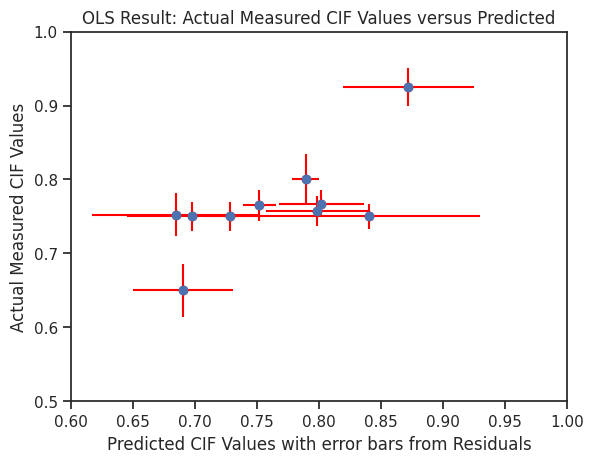

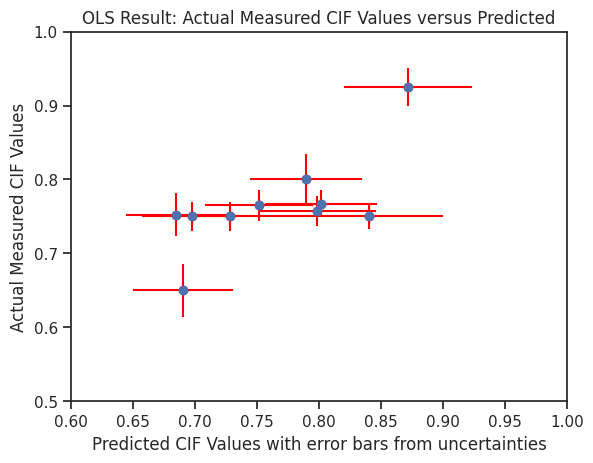

                                 OLS Regression Results                                
Dep. Variable:                    CIF   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              1003.
Date:                Mon, 14 Oct 2024   Prob (F-statistic):                    2.49e-10
Time:                        01:32:52   Log-Likelihood:                          16.072
No. Observations:                  10   AIC:                                     -28.14
Df Residuals:                       8   BIC:                                     -27.54
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<Figure size 640x480 with 0 Axes>

In [7]:
X=data_group2_df[['Tone','Probative']]
X = X[:]
Y=data_group2_df[['CIF']]
Y = Y[:]
CIF=Y[:]
CIF_np = CIF.to_numpy()
CIF_np = CIF_np.flatten()
CIF_err=data_group2_df[['CIF_STERR']]
CIF_err_np = CIF_err.to_numpy()
CIF_err_np = CIF_err_np.flatten()

model = sm.OLS(Y, X)
results = model.fit()

n = results.nobs
square_root_observations = np.sqrt(n)

# Access the average of the coefficients
parameters = results.params

# Access the standard errors of the coefficients
std_errors = results.bse

a_Tone_OLS = parameters['Tone']
b_Probative_OLS = parameters['Probative']

a_sterr_Tone_OLS = std_errors['Tone']
b_sterr_Probative_OLS = std_errors['Probative']

# Make predictions
CIF_pred = results.predict(X)
CIF_pred = pd.DataFrame(CIF_pred, columns=['CIF_pred'])
CIF_pred_np = CIF_pred.to_numpy()
CIF_pred_np = CIF_pred_np.flatten()
CIF_pred_err = abs(CIF['CIF'] - CIF_pred['CIF_pred'])
CIF_pred_err = pd.DataFrame(CIF_pred_err, columns=['CIF_pred_err'])
CIF_pred_err_np = CIF_pred_err.to_numpy()
CIF_pred_err_np = CIF_pred_err_np.flatten()

x=CIF_pred_np
y=CIF_np
# for Gaussian Processing
CIF_np_OLS = CIF_np
CIF_pred_np_OLS = CIF_pred_np

y_error=CIF_err_np
x_error=CIF_pred_err_np

plt.plot(x, y,'ro',label='Data into OLS Regression model')
plt.errorbar(x, y, xerr=x_error, yerr=y_error, capsize=0,fmt='o', ecolor = "red")
plt.xlabel("Predicted CIF Values with error bars from Residuals")
plt.ylabel("Actual Measured CIF Values")
plt.xlim((0.6, 1))
plt.ylim((0.5, 1))
plt.title("OLS Result: Actual Measured CIF Values versus Predicted")
plt.show()

plt.savefig('OLS Result_Actual_Measured_CIF_Values_versus_Predicted_from_residuals.png')

CIF_stdev=np.zeros(10)
CIF_sterr=np.zeros(10)

CIF_COUNT_np = CIF_COUNT.to_numpy()

for i in range(10):
  term1=a_Tone_OLS*a_Tone_OLS*Tone_sterr[i]*Tone_sterr[i]
  term2=b_Probative_OLS*b_Probative_OLS*Probative_sterr[i]*Probative_sterr[i]
  term3=Tone[i]*Tone[i]*a_sterr_Tone_OLS*a_sterr_Tone_OLS
  term4=Probative[i]*Probative[i]*b_sterr_Probative_OLS*b_sterr_Probative_OLS

  CIF_stdev[i] =  np.sqrt(term1+term2+term3+term4)
  CIF_sterr[i] =  CIF_stdev[i]/np.sqrt(CIF_COUNT_np[i])

y_error=CIF_err_np
x_error=CIF_sterr

plt.plot(x, y,'ro',label='Data into OLS Regression model')
plt.errorbar(x, y, xerr=x_error, yerr=y_error, capsize=0,fmt='o', ecolor = "red")
plt.xlabel("Predicted CIF Values with error bars from uncertainties")
plt.ylabel("Actual Measured CIF Values")
plt.xlim((0.6, 1))
plt.ylim((0.5, 1))
plt.title("OLS Result: Actual Measured CIF Values versus Predicted")
plt.show()

plt.savefig('OLS Result_Actual_Measured_CIF_Values_versus_Predicted_from_error_prop.png')

summary_string = str(results.summary())
print(summary_string)

CIF_mean_sterr_comparison_OLS=np.zeros((6,10))

for i in range(10):
  CIF_mean_sterr_comparison_OLS[0,i] = CIF_np[i]
  CIF_mean_sterr_comparison_OLS[1,i] = CIF_err_np[i]
  CIF_mean_sterr_comparison_OLS[2,i] = CIF_pred_np[i]
  CIF_mean_sterr_comparison_OLS[3,i] = CIF_pred_err_np[i]
  CIF_mean_sterr_comparison_OLS[4,i] = CIF_pred_np[i]
  CIF_mean_sterr_comparison_OLS[5,i] = CIF_sterr[i]

# Save the array to a CSV file
np.savetxt('OLS Result: CIF_mean_sterr_comparison_OLS.csv', CIF_mean_sterr_comparison_OLS, delimiter=',')

In [8]:
# Gaussian Processing - Step 1 for OLS
import numpy as np

def kernel(X1, X2, l=1.0, sigma_f=1.0):
    '''
    Isotropic squared exponential kernel. Computes
    a covariance matrix from points in X1 and X2.

    Args:
        X1: Array of m points (m x d).
        X2: Array of n points (n x d).

    Returns:
        Covariance matrix (m x n).
    '''
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

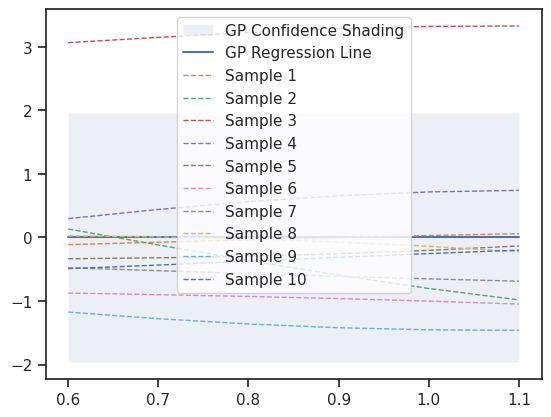

In [9]:
# Gaussian Processing - Step 2 for OLS
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))

    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1, label='GP Confidence Shading')
    plt.plot(X, mu, label='GP Regression Line')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'bo', label='Data into GP Regression Model')
    plt.legend()

def plot_gp_2D(gx, gy, mu, X_train, Y_train, title, i):
    ax = plt.gcf().add_subplot(1, 2, i, projection='3d')
    ax.plot_surface(gx, gy, mu.reshape(gx.shape), cmap=cm.coolwarm, linewidth=0, alpha=0.2, antialiased=False)
    ax.scatter(X_train[:,0], X_train[:,1], Y_train, c=Y_train, cmap=cm.coolwarm)
    ax.set_title(title)

# Finite number of points
X = np.arange(0.6, 1.1, 0.1).reshape(-1, 1)

# Mean and covariance of the prior
mu = np.zeros(X.shape)
cov = kernel(X, X)

# Draw three samples from the prior
samples = np.random.multivariate_normal(mu.ravel(), cov, 10)

# Plot GP mean, confidence interval and samples
plot_gp(mu, cov, X, samples=samples)


In [10]:
# Gaussian Processing - Step 3 for OLS
from numpy.linalg import inv

def posterior_predictive(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    '''
    Computes the suffifient statistics of the GP posterior predictive distribution
    from m training data X_train and Y_train and n new inputs X_s.

    Args:
        X_s: New input locations (n x d).
        X_train: Training locations (m x d).
        Y_train: Training targets (m x 1).
        l: Kernel length parameter.
        sigma_f: Kernel vertical variation parameter.
        sigma_y: Noise parameter.

    Returns:
        Posterior mean vector (n x d) and covariance matrix (n x n).
    '''
    K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = inv(K)

    # Equation (4)
    mu_s = K_s.T.dot(K_inv).dot(Y_train)

    # Equation (5)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)

    return mu_s, cov_s

<ipython-input-11-9dade2c2265a>:48: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 10)
<ipython-input-9-e10101405597>:11: RuntimeWarning: invalid value encountered in sqrt
  uncertainty = 1.96 * np.sqrt(np.diag(cov))


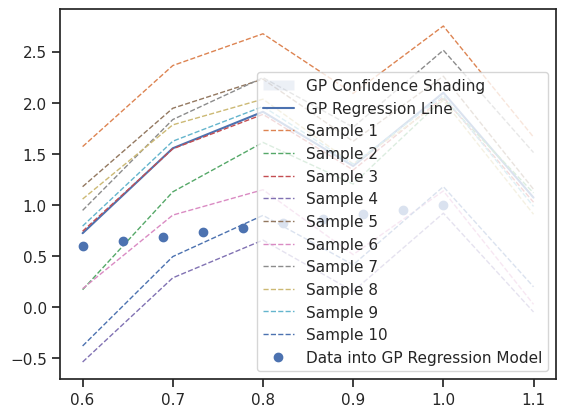

In [11]:
# Gaussian Processing - Step 4 for OLS
# Noise free training data

nsample = 10

T_range = np.linspace(0.6, 1, nsample)
P_range = np.linspace(0.6, 1, nsample)
Train_range = np.linspace(0.6, 1, nsample)

beta_OLS = [a_Tone_OLS, b_Probative_OLS]

CI_x_OLS = np.zeros((nsample))
x1_OLS = np.zeros((nsample))
x2_OLS = np.zeros((nsample))
x3_OLS = np.zeros((nsample))
CI_x_OLS_Train = np.zeros((nsample))
CI_x_OLS_data = np.zeros((nsample))

Tone = data_group2_df['Tone']
Probative = data_group2_df['Probative']

for i in range(nsample):
  x1_OLS[i] = T_range[i]*beta_OLS[0]
  x2_OLS[i] = P_range[i]*beta_OLS[1]
  CI_x_OLS[i] = x1_OLS[i] + x2_OLS[i]
  x1_OLS[i] = Tone[i]*beta_OLS[0]
  x2_OLS[i] = Probative[i]*beta_OLS[1]
  CI_x_OLS_data[i] = x1_OLS[i] + x2_OLS[i]

Measured_CIFS =  CIF_np_OLS.reshape(-1, 1)
Predicted_CIFS = CI_x_OLS_data.reshape(-1, 1)
Predicted_OLS_CIFS = CI_x_OLS.reshape(-1, 1)
Train_range = Train_range.reshape(-1, 1)

# Noise free training data

noise=0

X_train = Train_range
X_train1 = X_train
X_train2 = X_train1*(1*np.random.random_sample()-0)*noise
X_train2 = np.add(X_train1,X_train2)
Y_train = X_train2

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 10)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)

<ipython-input-12-e5cd2fa7b502>:21: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
<ipython-input-9-e10101405597>:11: RuntimeWarning: invalid value encountered in sqrt
  uncertainty = 1.96 * np.sqrt(np.diag(cov))


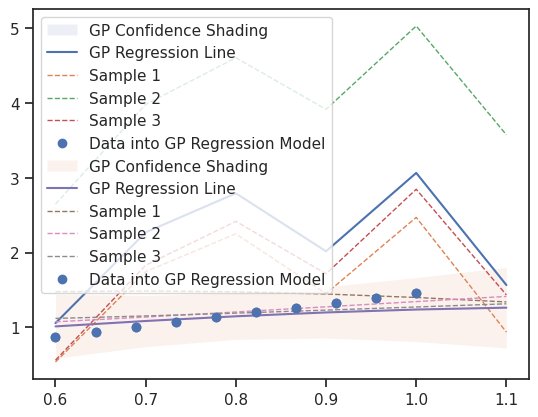

In [12]:
# Gaussian Processing - Step 5 for OLS

noise = 0.5

# Noisy training data

Measured_CIFS =  CIF_np_OLS.reshape(-1, 1)
Predicted_CIFS = CI_x_OLS_data.reshape(-1, 1)
Predicted_OLS_CIFS = CI_x_OLS.reshape(-1, 1)
Train_range = Train_range.reshape(-1, 1)

X_train = Train_range
X_train1 = X_train
X_train2 = X_train1*(1*np.random.random_sample()-0)*noise
X_train2 = np.add(X_train1,X_train2)
Y_train = X_train2

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)
# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, sigma_y=noise)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)

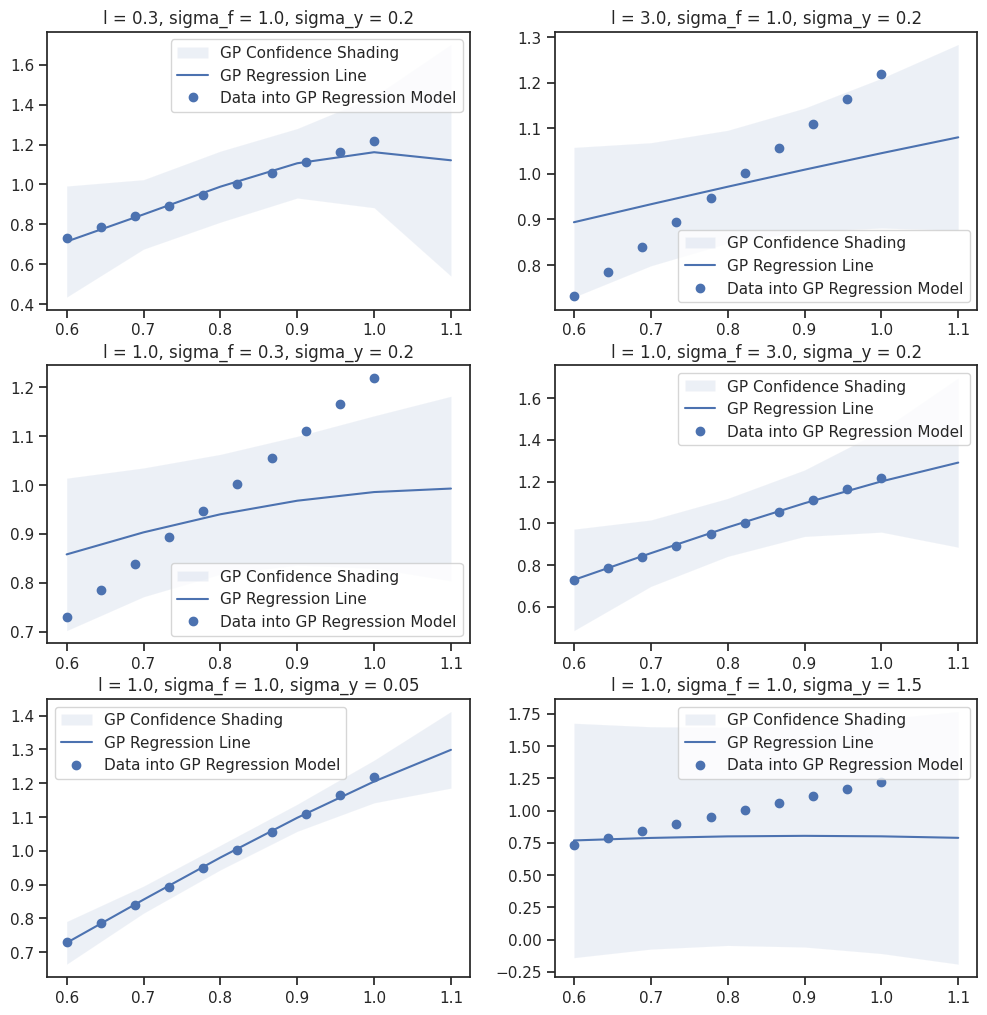

In [13]:
# Gaussian Processing - Step 6 for OLS
import matplotlib.pyplot as plt

params = [
    (0.3, 1.0, 0.2),
    (3.0, 1.0, 0.2),
    (1.0, 0.3, 0.2),
    (1.0, 3.0, 0.2),
    (1.0, 1.0, 0.05),
    (1.0, 1.0, 1.5),
]

noise = 0.5

Measured_CIFS =  CIF_np_OLS.reshape(-1, 1)
Predicted_CIFS = CI_x_OLS_data.reshape(-1, 1)
Predicted_OLS_CIFS = CI_x_OLS.reshape(-1, 1)
Train_range = Train_range.reshape(-1, 1)

X_train = Train_range
X_train1 = X_train
X_train2 = X_train1*(1*np.random.random_sample()-0)*noise
X_train2 = np.add(X_train1,X_train2)
Y_train = X_train2

plt.figure(figsize=(12, 5))

for i, (l, sigma_f, sigma_y) in enumerate(params):
    mu_s, cov_s = posterior_predictive(X, X_train, Y_train, l=l,
                                       sigma_f=sigma_f,
                                       sigma_y=sigma_y)
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(top=2)
    plt.title(f'l = {l}, sigma_f = {sigma_f}, sigma_y = {sigma_y}')
    plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

Text(0, 0.5, 'ND Measured CIFS')

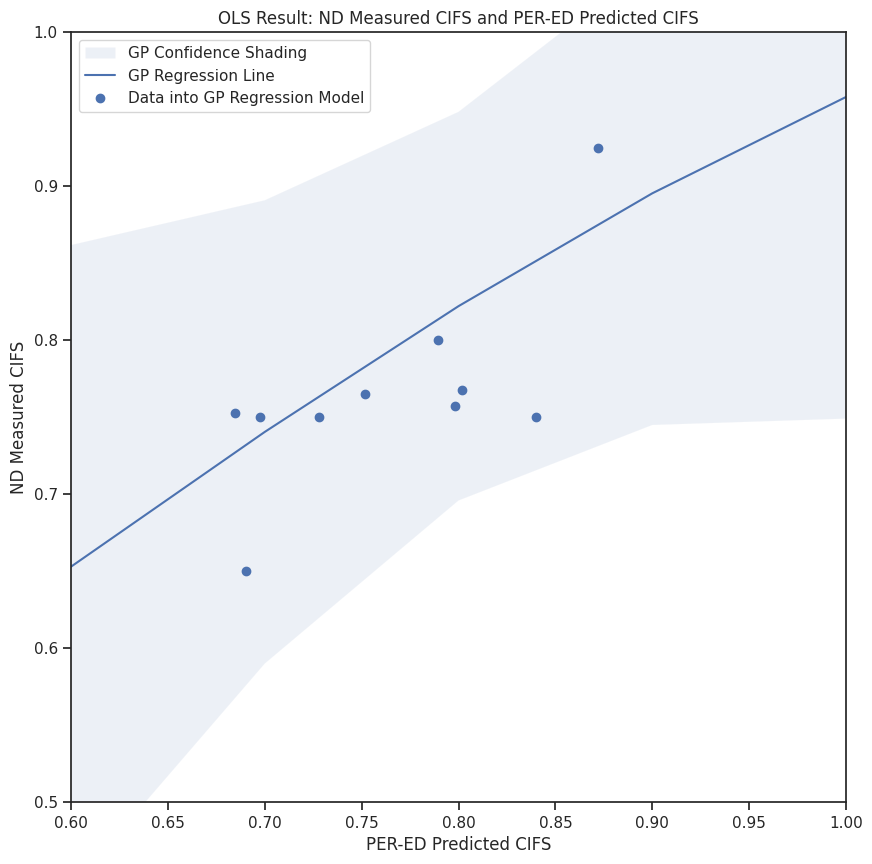

In [14]:
# Gaussian Processing - Step 7 for OLS
from numpy.linalg import cholesky, det, lstsq
from scipy.optimize import minimize

def nll_fn(X_train, Y_train, noise, naive=True):
    '''
    Returns a function that computes the negative log marginal
    likelihood for training data X_train and Y_train and given
    noise level.

    Args:
        X_train: training locations (m x d).
        Y_train: training targets (m x 1).
        noise: known noise level of Y_train.
        naive: if True use a naive implementation of Eq. (7), if
               False use a numerically more stable implementation.

    Returns:
        Minimization objective.
    '''
    def nll_naive(theta):
        # Naive implementation of Eq. (7). Works well for the examples
        # in this article but is numerically less stable compared to
        # the implementation in nll_stable below.
        K = kernel(X_train, X_train, l=theta[0], sigma_f=theta[1]) + \
            noise**2 * np.eye(len(X_train))
        return 0.5 * np.log(det(K)) + \
               0.5 * Y_train.T.dot(inv(K).dot(Y_train)) + \
               0.5 * len(X_train) * np.log(2*np.pi)

    def nll_stable(theta):
        # Numerically more stable implementation of Eq. (7) as described
        # in http://www.gaussianprocess.org/gpml/chapters/RW2.pdf, Section
        # 2.2, Algorithm 2.1.
        K = kernel(X_train, X_train, l=theta[0], sigma_f=theta[1]) + \
            noise**2 * np.eye(len(X_train))
        L = cholesky(K)
        return np.sum(np.log(np.diagonal(L))) + \
               0.5 * Y_train.T.dot(lstsq(L.T, lstsq(L, Y_train)[0])[0]) + \
               0.5 * len(X_train) * np.log(2*np.pi)

    if naive:
        return nll_naive
    else:
        return nll_stable

# Minimize the negative log-likelihood w.r.t. parameters l and sigma_f.
# We should actually run the minimization several times with different
# initializations to avoid local minima but this is skipped here for
# simplicity.

noise = 0.2

# Noisy training data
Measured_CIFS =  CIF_np_OLS.reshape(-1, 1)
Predicted_CIFS = CI_x_OLS_data.reshape(-1, 1)
Predicted_OLS_CIFS = CI_x_OLS.reshape(-1, 1)
Train_range = Train_range.reshape(-1, 1)

X_train = Train_range
X_train1 = X_train
X_train2 = X_train1*(1*np.random.random_sample()-0)*noise
X_train2 = np.add(X_train1,X_train2)
Y_train = X_train2

res = minimize(nll_fn(X_train, Y_train, noise), [1, 1],
               bounds=((1e-5, None), (1e-5, None)),
               method='L-BFGS-B')


# Store the optimization results in global variables so that we can
# compare it later with the results from other implementations.
l_opt, sigma_f_opt = res.x
l_opt, sigma_f_opt

# Compute the prosterior predictive statistics with optimized kernel parameters and plot the results
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, l=l_opt, sigma_f=sigma_f_opt, sigma_y=noise)

fig, ax = plt.subplots(figsize=[10, 10])
#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[40, 40], num=12)
plot_gp(mu_s, cov_s, X, Predicted_CIFS , Measured_CIFS)
#ax.plot(y_measured, y_calculated, 'b*', label="Data")
#ax.plot(y_model_ideal, y_model_calculated, 'r--', label="Model")
#ax.plot(y_model_ideal, y_calculated_upper, 'y-', label="Standard Deviation")
#ax.plot(y_model_ideal, y_calculated_lower, 'y-')#, label="Standard Deviation")
#ax.legend(loc="best");
ax.set_xlim((0.6, 1))
ax.set_ylim((0.5, 1))
ax.set_title('OLS Result: ND Measured CIFS and PER-ED Predicted CIFS')
ax.set_xlabel("PER-ED Predicted CIFS")
ax.set_ylabel("ND Measured CIFS")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


                                 WLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            WLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              917.0
Date:                Mon, 14 Oct 2024   Prob (F-statistic):                    3.56e-10
Time:                        01:32:57   Log-Likelihood:                          15.073
No. Observations:                  10   AIC:                                     -26.15
Df Residuals:                       8   BIC:                                     -25.54
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

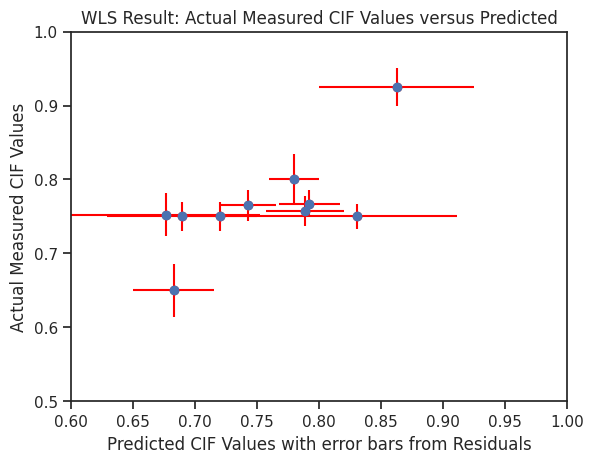

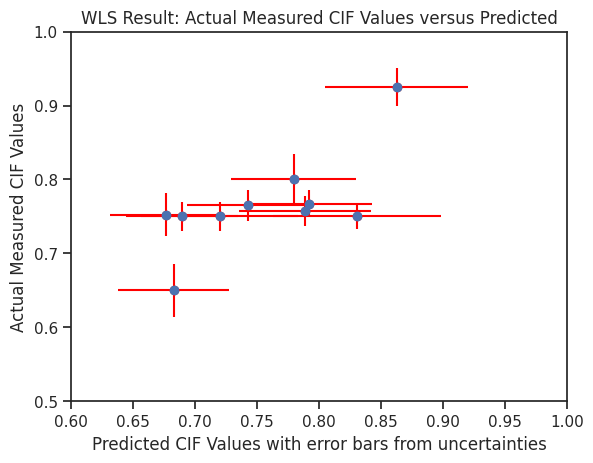

In [15]:
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X=data_group2_df[['Tone','Probative']]
X = X[:]
X_np = X.to_numpy()

X_sterr=data_group2_df[['Tone_STERR','Probative_STERR']]
X_sterr = X_sterr[:]
X_sterr_np = X_sterr.to_numpy()

Y=data_group2_df[['CIF']]
Y = Y[:]
Y_np = Y.to_numpy()
Y_sterr=data_group2_df[['CIF_STERR']]
Y_sterr = Y_sterr[:]
Y_sterr_np = Y_sterr.to_numpy()

CIF=data_group2_df[['CIF']]
CIF_np = CIF.to_numpy()
CIF_sterr=data_group2_df[['CIF_STERR']]
CIF_sterr_np = CIF_sterr.to_numpy()

# Example data for X (independent variables) and Y (dependent variable)
X_means = X_np         # Example X means as numpy array
Y_means = Y_np         # Example Y means as numpy array

# Standard errors
X_errors = X_sterr_np  # Example X standard errors as numpy array
Y_errors = Y_sterr_np  # Example Y standard errors as numpy array

# Calculate the weights for WLS (inverse of variances)
weights = 1 / Y_errors**2

#X_means = sm.add_constant(X_means)  # Add a constant (intercept) term

# Fit the weighted least squares (WLS) model
CI_res = sm.WLS(Y_means, X_means, weights=weights)
res = CI_res.fit()

CI_prstd, CI_iv_l, CI_iv_u = wls_prediction_std(res)

CI_y = res.fittedvalues
y_err = CI_prstd

model = sm.WLS(Y_means, X_means, weights=weights)
results = model.fit()

print(results.summary())

# Access the average of the coefficients
parameters = res.params
#print(parameters)

# Access the standard errors of the coefficients
std_errors = res.bse
#print(std_errors)

a_Tone_WLS = parameters[0]
b_Probative_WLS = parameters[1]

a_sterr_Tone_WLS = std_errors[0]
b_sterr_Probative_WLS = std_errors[1]

# Make predictions
CIF_pred = results.predict(X_means)
CIF_pred = pd.DataFrame(CIF_pred, columns=['CIF_pred'])
CIF_pred_np = CIF_pred.to_numpy()
CIF_pred_np = CIF_pred_np.flatten()
CIF_pred_err = abs(CIF['CIF'] - CIF_pred['CIF_pred'])
CIF_pred_err = pd.DataFrame(CIF_pred_err, columns=['CIF_pred_err'])
CIF_pred_err_np = CIF_pred_err.to_numpy()
CIF_pred_err_np = CIF_pred_err_np.flatten()

x=CIF_pred_np
y=CIF_np

# for Gaussian Processing
CIF_np_WLS = CIF_np
CIF_pred_np_WLS = CIF_pred_np

x_error=CIF_pred_err_np
CIF_np = CIF_np.flatten()
y = CIF_np
CIF_sterr_np = CIF_sterr_np.flatten()
y_error=CIF_sterr_np

plt.plot(x, y,'ro',label='Data into OLS Regression model')
plt.errorbar(x, y, xerr=x_error, yerr=y_error, capsize=0,fmt='o', ecolor = "red")
plt.xlabel("Predicted CIF Values with error bars from Residuals")
plt.ylabel("Actual Measured CIF Values")
plt.xlim((0.6, 1))
plt.ylim((0.5, 1))
plt.title("WLS Result: Actual Measured CIF Values versus Predicted")
plt.show()

plt.savefig('WLS Result_Actual_Measured_CIF_Values_versus_Predicted_from_residuals.png')

CIF_stdev = np.zeros(10)
CIF_sterr = np.zeros(10)

for i in range(10):
  term1=a_Tone_WLS*a_Tone_WLS*Tone_sterr[i]*Tone_sterr[i]
  term2=b_Probative_WLS*b_Probative_WLS*Probative_sterr[i]*Probative_sterr[i]
  term3=Tone[i]*Tone[i]*a_sterr_Tone_WLS*a_sterr_Tone_WLS
  term4=Probative[i]*Probative[i]*b_sterr_Probative_WLS*b_sterr_Probative_WLS

  CIF_stdev[i] =  np.sqrt(term1+term2+term3+term4)
  CIF_sterr[i] =  CIF_stdev[i]/np.sqrt(CIF_COUNT[i])

y_error=CIF_sterr_np
y_error=y_error.flatten()
y_error=y_error.T
x_error=CIF_sterr
x_error=x_error.flatten()

plt.plot(x, y,'ro',label='Data into OLS Regression model')
plt.errorbar(x, y, xerr=x_error, yerr=y_error, capsize=0,fmt='o', ecolor = "red")
plt.xlim((0.6, 1))
plt.ylim((0.5, 1))
plt.xlabel("Predicted CIF Values with error bars from uncertainties")
plt.ylabel("Actual Measured CIF Values")
plt.title("WLS Result: Actual Measured CIF Values versus Predicted")

plt.savefig('WLS Result_Actual_Measured_CIF_Values_versus_Predicted_from_error_prop.png')

CIF_mean_sterr_comparison_WLS=np.zeros((10,6))

for i in range(10):
  CIF_mean_sterr_comparison_WLS[i,0] = CIF_np[i]
  CIF_mean_sterr_comparison_WLS[i,1] = CIF_err_np[i]
  CIF_mean_sterr_comparison_WLS[i,2] = CIF_pred_np[i]
  CIF_mean_sterr_comparison_WLS[i,3] = CIF_pred_err_np[i]
  CIF_mean_sterr_comparison_WLS[i,4] = CIF_pred_np[i]
  CIF_mean_sterr_comparison_WLS[i,5] = CIF_sterr[i]

# Save the array to a CSV file
np.savetxt('WLS Result: CIF_mean_sterr_comparison_WLS.csv', CIF_mean_sterr_comparison_WLS, delimiter=',')

In [29]:
try:
    # Check if notebook is running in Google Colab
    import google.colab
    # Get additional files from Github
    !wget https://raw.githubusercontent.com/krasserm/bayesian-machine-learning/master/gaussian_processes_util.py
    # Install additional dependencies
    !pip install GPy==1.9.8
except:
    pass

--2024-10-14 01:35:38--  https://raw.githubusercontent.com/krasserm/bayesian-machine-learning/master/gaussian_processes_util.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 901 [text/plain]
Saving to: ‘gaussian_processes_util.py’

gaussian_processes_ 100%[===================>]     901  --.-KB/s    in 0s      

2024-10-14 01:35:38 (38.6 MB/s) - ‘gaussian_processes_util.py’ saved [901/901]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.5/989.5 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 8.5 MB/s eta 0:00:00
  Created wheel for GPy: filename=GPy-1.9.8-cp310-cp310-linux_x86_64.whl size=3450801 sha256=e7f14633392c4938503b4ad03b78a87ce7aef0eca7077c3925bc4b09c509ce9e
  Stored in

In [89]:
# Gaussian Processing - Step 1 for WLS
import numpy as np

def kernel(X1, X2, l=1.0, sigma_f=1.0):
    '''
    Isotropic squared exponential kernel. Computes
    a covariance matrix from points in X1 and X2.

    Args:
        X1: Array of m points (m x d).
        X2: Array of n points (n x d).

    Returns:
        Covariance matrix (m x n).
    '''
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

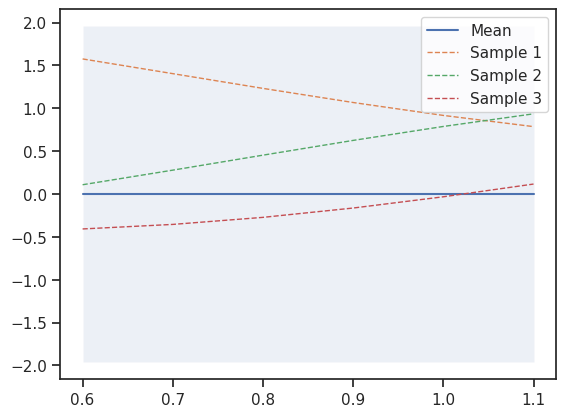

In [90]:
# Gaussian Processing - Step 2 for WLS
%matplotlib inline

from gaussian_processes_util import plot_gp

# Finite number of points
X = np.arange(0.6, 1.1, 0.1).reshape(-1, 1)

# Mean and covariance of the prior
mu = np.zeros(X.shape)
cov = kernel(X, X)

# Draw three samples from the prior
samples = np.random.multivariate_normal(mu.ravel(), cov, 3)

# Plot GP mean, confidence interval and samples
plot_gp(mu, cov, X, samples=samples)

In [91]:
# Gaussian Processing - Step 3 for WLS
from numpy.linalg import inv

def posterior_predictive(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    '''
    Computes the suffifient statistics of the GP posterior predictive distribution
    from m training data X_train and Y_train and n new inputs X_s.

    Args:
        X_s: New input locations (n x d).
        X_train: Training locations (m x d).
        Y_train: Training targets (m x 1).
        l: Kernel length parameter.
        sigma_f: Kernel vertical variation parameter.
        sigma_y: Noise parameter.

    Returns:
        Posterior mean vector (n x d) and covariance matrix (n x n).
    '''
    K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = inv(K)

    # Equation (4)
    mu_s = K_s.T.dot(K_inv).dot(Y_train)

    # Equation (5)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)

    return mu_s, cov_s

<ipython-input-92-b8e417d3603b>:47: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)


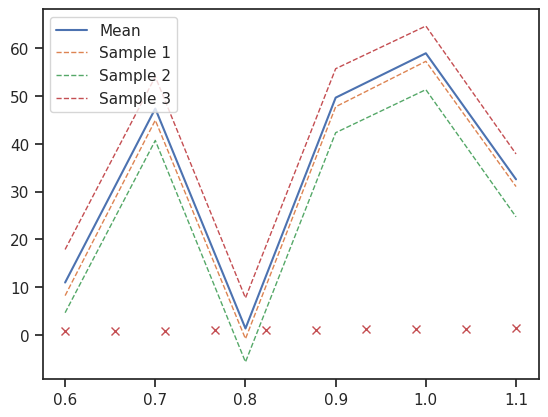

In [92]:
# Gaussian Processing - Step 4 for WLS
# Noise free training data

nsample = 10

T_range = np.linspace(0.6, 1.1, nsample)
P_range = np.linspace(0.6, 1.1, nsample)
Train_range = np.linspace(0.6, 1.1, nsample)

beta_WLS = [a_Tone_WLS, b_Probative_WLS]

CI_x_WLS = np.zeros((nsample))
x1_WLS = np.zeros((nsample))
x2_WLS = np.zeros((nsample))
x3_WLS = np.zeros((nsample))
CI_x_WLS_Train = np.zeros((nsample))
CI_x_WLS_data = np.zeros((nsample))

Tone = data_group2_df['Tone']
Probative = data_group2_df['Probative']

for i in range(nsample):
  x1_WLS[i] = T_range[i]*beta_WLS[0]
  x2_WLS[i] = P_range[i]*beta_WLS[1]
  CI_x_WLS[i] = x1_WLS[i] + x2_WLS[i]
  x1_WLS[i] = Tone[i]*beta_OLS[0]
  x2_WLS[i] = Probative[i]*beta_OLS[1]
  CI_x_WLS_data[i] = x1_WLS[i] + x2_WLS[i]

Measured_CIFS =  CIF_np_WLS.reshape(-1, 1)
Predicted_CIFS = CI_x_WLS_data.reshape(-1, 1)
Predicted_OLS_CIFS = CI_x_WLS.reshape(-1, 1)
Train_range = Train_range.reshape(-1, 1)

noise = 0.5

X_train = Train_range
X_train1 = X_train
X_train2 = X_train1*(1*np.random.random_sample()-0)*noise
X_train2 = np.add(X_train1,X_train2)
Y_train = X_train2


# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)

<ipython-input-93-28664011ed29>:19: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)


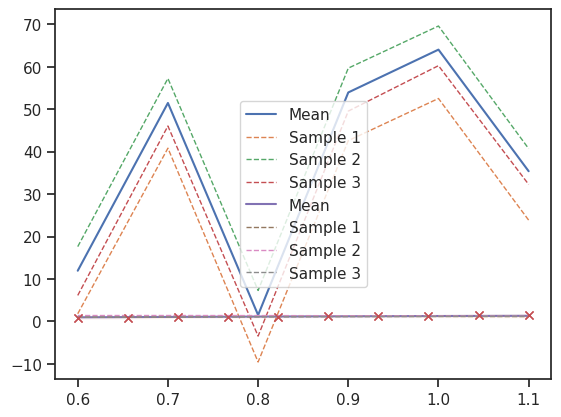

In [93]:
# Gaussian Processing - Step 5 for WLS
noise = 0.5

# Noisy training data
Measured_CIFS =  CIF_np_WLS.reshape(-1, 1)
Predicted_CIFS = CI_x_WLS_data.reshape(-1, 1)
Predicted_OLS_CIFS = CI_x_WLS.reshape(-1, 1)
Train_range = Train_range.reshape(-1, 1)

X_train = Train_range
X_train1 = X_train
X_train2 = X_train1*(1*np.random.random_sample()-0)*noise
X_train2 = np.add(X_train1,X_train2)
Y_train = X_train2

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)
# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, sigma_y=noise)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)

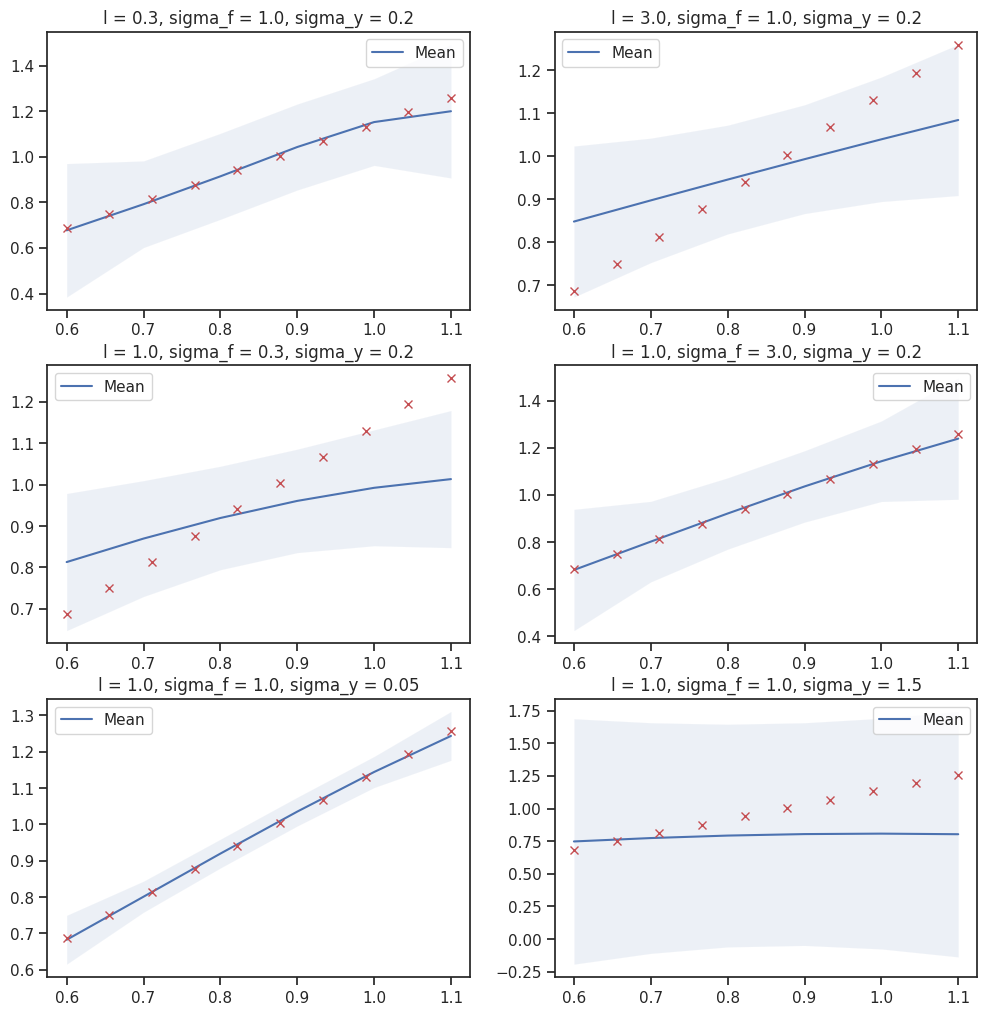

In [94]:
# Gaussian Processing - Step 6 for WLS
import matplotlib.pyplot as plt

params = [
    (0.3, 1.0, 0.2),
    (3.0, 1.0, 0.2),
    (1.0, 0.3, 0.2),
    (1.0, 3.0, 0.2),
    (1.0, 1.0, 0.05),
    (1.0, 1.0, 1.5),
]

noise = 0.5

Measured_CIFS =  CIF_np_WLS.reshape(-1, 1)
Predicted_CIFS = CI_x_WLS_data.reshape(-1, 1)
Predicted_OLS_CIFS = CI_x_WLS.reshape(-1, 1)
Train_range = Train_range.reshape(-1, 1)

X_train = Train_range
X_train1 = X_train
X_train2 = X_train1*(1*np.random.random_sample()-0)*noise
X_train2 = np.add(X_train1,X_train2)
Y_train = X_train2

plt.figure(figsize=(12, 5))

for i, (l, sigma_f, sigma_y) in enumerate(params):
    mu_s, cov_s = posterior_predictive(X, X_train, Y_train, l=l,
                                       sigma_f=sigma_f,
                                       sigma_y=sigma_y)
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(top=2)
    plt.title(f'l = {l}, sigma_f = {sigma_f}, sigma_y = {sigma_y}')
    plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

Text(0, 0.5, 'ND Measured CIFS')

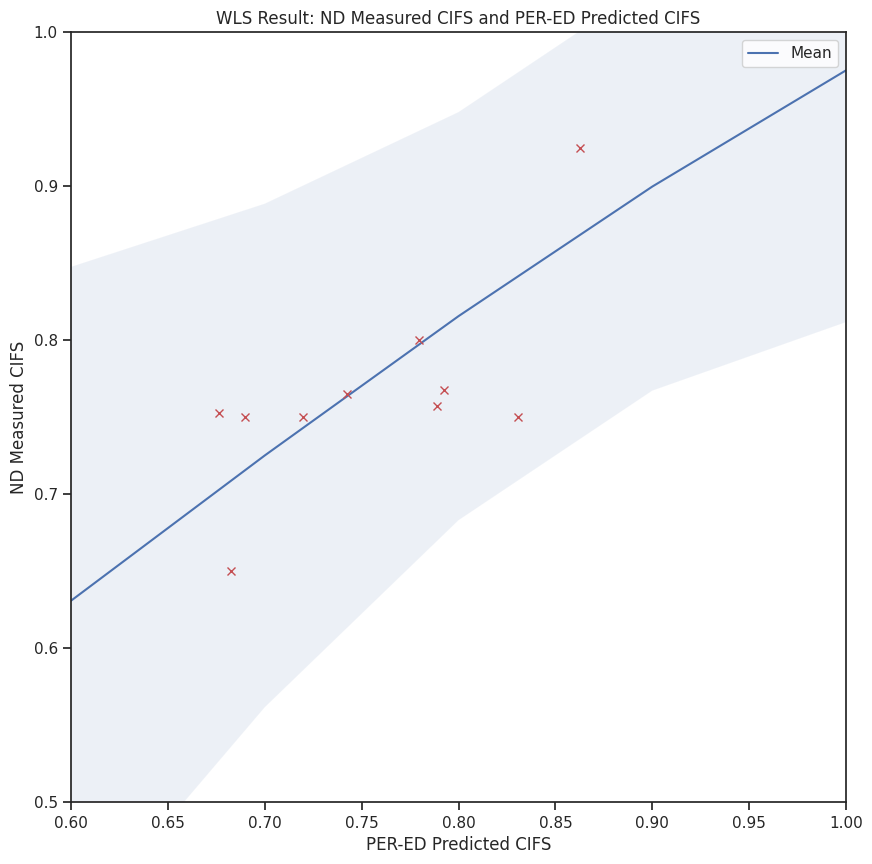

In [95]:
# Gaussian Processing - Step 7 for WLS
from numpy.linalg import cholesky, det, lstsq
from scipy.optimize import minimize

def nll_fn(X_train, Y_train, noise, naive=True):
    '''
    Returns a function that computes the negative log marginal
    likelihood for training data X_train and Y_train and given
    noise level.

    Args:
        X_train: training locations (m x d).
        Y_train: training targets (m x 1).
        noise: known noise level of Y_train.
        naive: if True use a naive implementation of Eq. (7), if
               False use a numerically more stable implementation.

    Returns:
        Minimization objective.
    '''
    def nll_naive(theta):
        # Naive implementation of Eq. (7). Works well for the examples
        # in this article but is numerically less stable compared to
        # the implementation in nll_stable below.
        K = kernel(X_train, X_train, l=theta[0], sigma_f=theta[1]) + \
            noise**2 * np.eye(len(X_train))
        return 0.5 * np.log(det(K)) + \
               0.5 * Y_train.T.dot(inv(K).dot(Y_train)) + \
               0.5 * len(X_train) * np.log(2*np.pi)

    def nll_stable(theta):
        # Numerically more stable implementation of Eq. (7) as described
        # in http://www.gaussianprocess.org/gpml/chapters/RW2.pdf, Section
        # 2.2, Algorithm 2.1.
        K = kernel(X_train, X_train, l=theta[0], sigma_f=theta[1]) + \
            noise**2 * np.eye(len(X_train))
        L = cholesky(K)
        return np.sum(np.log(np.diagonal(L))) + \
               0.5 * Y_train.T.dot(lstsq(L.T, lstsq(L, Y_train)[0])[0]) + \
               0.5 * len(X_train) * np.log(2*np.pi)

    if naive:
        return nll_naive
    else:
        return nll_stable

# Minimize the negative log-likelihood w.r.t. parameters l and sigma_f.
# We should actually run the minimization several times with different
# initializations to avoid local minima but this is skipped here for
# simplicity.

noise = 0.2

Measured_CIFS =  CIF_np_WLS.reshape(-1, 1)
Predicted_CIFS = CI_x_WLS_data.reshape(-1, 1)
Predicted_WLS_CIFS = CI_x_WLS.reshape(-1, 1)
Train_range = Train_range.reshape(-1, 1)

X_train = Train_range
X_train1 = X_train
X_train2 = X_train1*(1*np.random.random_sample()-0)*0.1
X_train2 = np.add(X_train1,X_train2)
Y_train = X_train2

res = minimize(nll_fn(X_train, Y_train, noise), [1, 1],
               bounds=((1e-5, None), (1e-5, None)),
               method='L-BFGS-B')

Measured_CIFS =  CIF_np_WLS
Predicted_CIFS =  CIF_pred_np_WLS
Train_CIFS = CI_x_WLS


# Store the optimization results in global variables so that we can
# compare it later with the results from other implementations.
l_opt, sigma_f_opt = res.x
l_opt, sigma_f_opt

# Compute the prosterior predictive statistics with optimized kernel parameters and plot the results
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, l=l_opt, sigma_f=sigma_f_opt, sigma_y=noise)

fig, ax = plt.subplots(figsize=[10, 10])
#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[40, 40], num=12)
plot_gp(mu_s, cov_s, X, Predicted_CIFS , Measured_CIFS)
#ax.plot(y_measured, y_calculated, 'b*', label="Data")
#ax.plot(y_model_ideal, y_model_calculated, 'r--', label="Model")
#ax.plot(y_model_ideal, y_calculated_upper, 'y-', label="Standard Deviation")
#ax.plot(y_model_ideal, y_calculated_lower, 'y-')#, label="Standard Deviation")
#ax.legend(loc="best");
ax.set_xlim((0.6, 1))
ax.set_ylim((0.5, 1))
ax.set_title('WLS Result: ND Measured CIFS and PER-ED Predicted CIFS')
ax.set_xlabel("PER-ED Predicted CIFS")
ax.set_ylabel("ND Measured CIFS")

0.00459732793
[0.7675 0.8    0.75   0.7525 0.65   0.75   0.75   0.7575 0.925  0.765 ]
[0.0185932  0.03446108 0.01732051 0.02951459 0.03591997 0.01946135
 0.01926143 0.01974914 0.02582527 0.02082317]


<ipython-input-23-0d4c054153a9>:125: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1[i] = T_range[i]*beta[0]
<ipython-input-23-0d4c054153a9>:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2[i] = P_range[i]*beta[1]


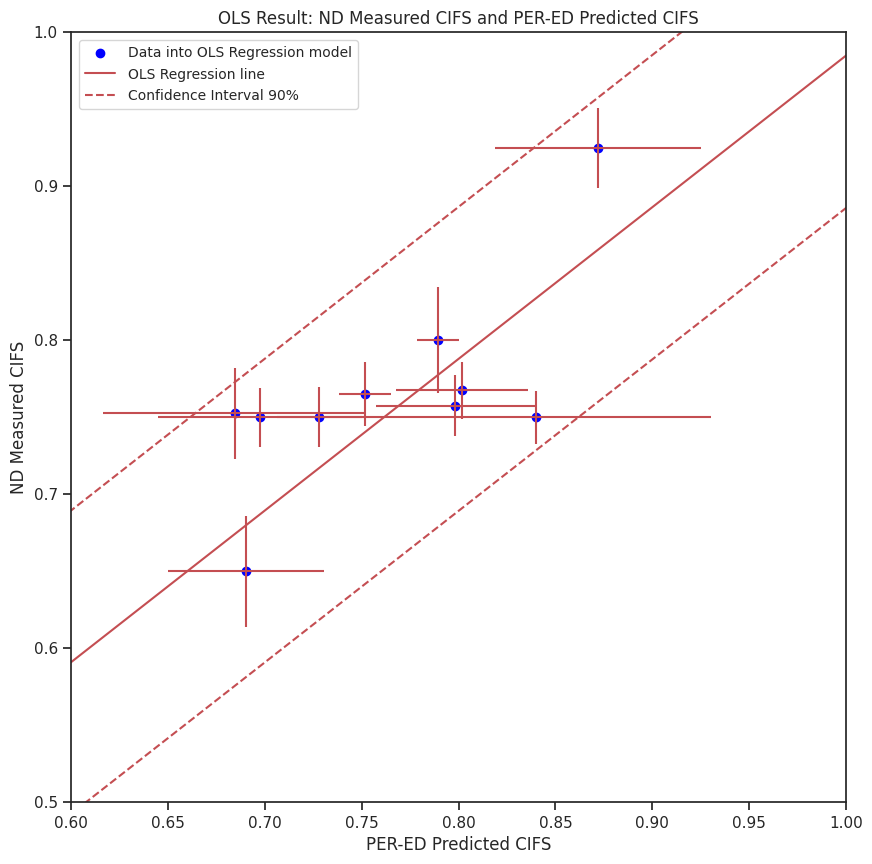

In [23]:
Tone = data_group2_df['Tone']
Word_Count = data_group2_df['Word Count']
Complexity = data_group2_df['Complexity']
Probative = data_group2_df['Probative']
CIF = data_group2_df['CIF']

Tone_stdev = data_group2_df['Tone_STDEV']
Word_Count_stdev = data_group2_df['WC_STDEV']
Complexity_stdev = data_group2_df['Complexity_STDEV']
Probative_stdev = data_group2_df['Probative_STDEV']
CIF_stdev = data_group2_df['CIF_STDEV']

Tone_sterr = data_group2_df['Tone_STERR']
Word_Count_sterr = data_group2_df['WC_STERR']
Complexity_sterr = data_group2_df['Complexity_STERR']
Probative_sterr = data_group2_df['Probative_STERR']
CIF_sterr = data_group2_df['CIF_STERR']

Tone_COUNT = data_group2_df['Tone_Count']
Word_Count_COUNT = data_group2_df['WC_Count']
Complexity_COUNT = data_group2_df['Complexity_Count']
Probative_COUNT = data_group2_df['Probative_Count']
CIF_COUNT = data_group2_df['Students']

X=data_group2_df[['Tone','Probative']]
X = X[:]
X_np = X.to_numpy()

X_sterr=data_group2_df[['Tone_STERR','Probative_STERR']]
X_sterr = X_sterr[:]
X_sterr_np = X_sterr.to_numpy()

Y=data_group2_df[['CIF']]
Y = Y[:]
y = Y
Y_np = Y.to_numpy()
Y_sterr=data_group2_df[['CIF_STERR']]
Y_sterr = Y_sterr[:]
Y_sterr_np = Y_sterr.to_numpy()

CIF=data_group2_df[['CIF']]
CIF_np = CIF.to_numpy()
CIF_sterr=data_group2_df[['CIF_STERR']]
CIF_sterr_np = CIF_sterr.to_numpy()

# OLS Model

model = sm.OLS(Y, X)
results = model.fit()

# number of observations in model
n = results.nobs
square_root_observations = np.sqrt(n)

# Average of the coefficients
parameters = results.params

# Standard errors of the coefficients
std_errors = results.bse

# Set up Method 1: Error Propagation for Graphing Error Bars
a_Tone_OLS = parameters['Tone']
b_Probative_OLS = parameters['Probative']

a_sterr_Tone_OLS = std_errors['Tone']
b_sterr_Probative_OLS = std_errors['Probative']

# Obtain the fitted values, residuals, and standard errors
fitted_values = results.fittedvalues
residuals = abs(results.resid)  # Residuals
standard_errors = results.bse  # Standard errors of the coefficients

# First graph is error bars with residuals
model_err = residuals

# Second Graph is error bars with error propatation with model uncertainties and measured uncertainities

n = 10
df = 2
mean_T = Tone.to_numpy()
mean_P = Probative.to_numpy()
sigma_T = Tone_sterr.to_numpy()
sigma_T = sigma_T.flatten()
sigma_P = Probative_sterr.to_numpy()
sigma_P = sigma_P.flatten()

# Calculated CIFS = aT + bT: where coef_T = a      coef_P = b
# Calculate sigma_x = sqrt ( dC/dT^2 sigma_T^2 + dC/dP^2 sigma_P^2 + dC/da^2 sigma_a^2 + dC/db^2 sigma_b^2)

x_error_bars_error_prop = np.zeros(10)
x_data = np.zeros(10)
Term1 = np.zeros(10)
Term2 = np.zeros(10)
Term3 = np.zeros(10)
Term4 = np.zeros(10)

print(sigma_T[0])

for i in range(10):
  x_data[i] = a_Tone_OLS*mean_T[i]+b_Probative_OLS*mean_P[i]
  Term1[i] = (a_Tone_OLS)*(sigma_T[i])
  Term2[i] = (b_Probative_OLS)*(sigma_P[i])
  Term3[i] = (mean_T[i])*(a_sterr_Tone_OLS)
  Term4[i] = (mean_P[i])*(b_sterr_Probative_OLS)

  x_error_bars_error_prop[i] = np.sqrt(Term1[i]*Term1[i] + Term2[i]*Term2[i] + Term3[i]*Term3[i] + Term4[i]*Term4[i])

y_data = Measured_CIFS
y_err = CIF_sterr_np.flatten()

# Regression line and confidence interval lines above and below Regression line

nsample = 100
sig=0.1
T_range = np.linspace(0, 1, nsample)
P_range = np.linspace(0, 1, nsample)
beta = parameters

CI_x = np.zeros((nsample))
x1 = np.zeros((nsample))
x2 = np.zeros((nsample))
x3 = np.zeros((nsample))

for i in range(nsample):
  x1[i] = T_range[i]*beta[0]
  x2[i] = P_range[i]*beta[1]
  CI_x[i] = x1[i] + x2[i]

X = np.column_stack((x1, x2))
y = CI_x
y_true = y
y = y_true + sig * np.random.normal(size=nsample)
y_data = Measured_CIFS.flatten()
print(y_data)
y_err = CIF_sterr_np.flatten()
print(y_err)

# Adding some weights (inverse of the variance)
weights = 1 / (0.5 ** 2)  # Constant weights for using in WLS
# or use OLS model outpint into wls with this function and outputs
# prstd, iv_l, iv_u = wls_prediction_std(res)

CI_res = sm.OLS(y, X).fit()
res = sm.OLS(y, X).fit()

CI_prstd, CI_iv_l, CI_iv_u = wls_prediction_std(CI_res)

CI_y = CI_res.fittedvalues

CI_m_x = CI_x
CI_m_mean_x = np.mean(CI_x)
CI_m_s_err = np.std(CI_x)/np.sqrt(n)
CI_m_confs = np.sqrt((CI_m_s_err/(n-2))*(1.0/n + (np.power((CI_m_x-CI_m_mean_x),2)/((np.sum(np.power(CI_m_x,2)))-n*(np.power(CI_m_mean_x,2))))))

CI_m_y = [0 for i in range(nsample)]
lower_CI_x = [0 for i in range(nsample)]
upper_CI_x = [0 for i in range(nsample)]
lower_CI_y = [0 for i in range(nsample)]
upper_CI_y = [0 for i in range(nsample)]
upper_CI_y = [0 for i in range(nsample)]

# now predict y based on test x-values
for i in range(nsample):
  upper_CI_x[i] = CI_x[i]
  lower_CI_x[i] = CI_x[i]
  upper_CI_y[i] = CI_y[i] + CI_prstd[i]
  lower_CI_y[i] = CI_y[i] - CI_prstd[i]

# plot 1
plt.subplots(figsize=[10, 10])
plt.scatter(x_data,y_data,color='blue', marker='o', label='Data into OLS Regression model')
plt.title('OLS Result: ND Measured CIFS and PER-ED Predicted CIFS')
plt.xlabel("PER-ED Predicted CIFS")
plt.ylabel("ND Measured CIFS")

# plot line of best fit
plt.plot(CI_x,CI_y,'r-', label='OLS Regression line')

# plot confidence limits
plt.plot(CI_m_x,lower_CI_y,'r--', label='Confidence Interval 90%')
plt.plot(CI_m_x,upper_CI_y,'r--')

# set coordinate limits
plt.xlim(0.6,1)
plt.ylim(0.5,1)

# configure legend
plt.legend(loc=0)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=10)
plt.errorbar(x_data, y_data, xerr=model_err, yerr=y_err, ecolor='r', capthick=0.1, fmt='none', label='subsets of xuplims and xlolims')

# show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


                                 WLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            WLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              917.0
Date:                Mon, 14 Oct 2024   Prob (F-statistic):                    3.56e-10
Time:                        01:33:05   Log-Likelihood:                          15.073
No. Observations:                  10   AIC:                                     -26.15
Df Residuals:                       8   BIC:                                     -25.54
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

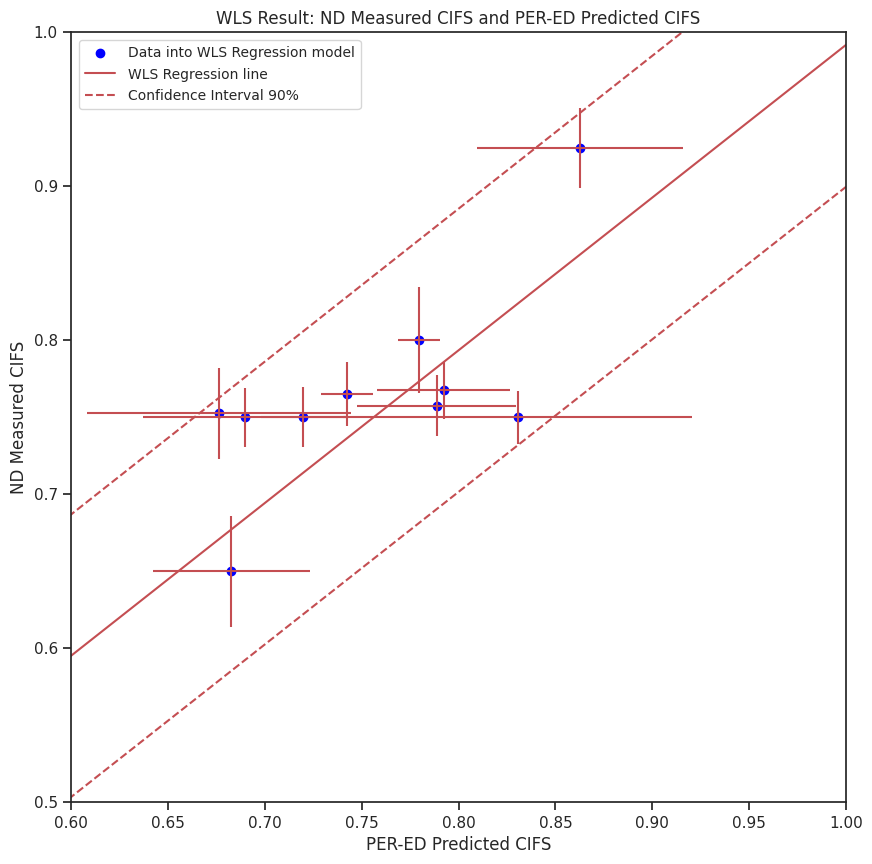

In [24]:
Tone = data_group2_df['Tone']
Word_Count = data_group2_df['Word Count']
Complexity = data_group2_df['Complexity']
Probative = data_group2_df['Probative']
CIF = data_group2_df['CIF']

Tone_stdev = data_group2_df['Tone_STDEV']
Word_Count_stdev = data_group2_df['WC_STDEV']
Complexity_stdev = data_group2_df['Complexity_STDEV']
Probative_stdev = data_group2_df['Probative_STDEV']
CIF_stdev = data_group2_df['CIF_STDEV']

Tone_sterr = data_group2_df['Tone_STERR']
Word_Count_sterr = data_group2_df['WC_STERR']
Complexity_sterr = data_group2_df['Complexity_STERR']
Probative_sterr = data_group2_df['Probative_STERR']
CIF_sterr = data_group2_df['CIF_STERR']

Tone_COUNT = data_group2_df['Tone_Count']
Word_Count_COUNT = data_group2_df['WC_Count']
Complexity_COUNT = data_group2_df['Complexity_Count']
Probative_COUNT = data_group2_df['Probative_Count']
CIF_COUNT = data_group2_df['Students']

y_err = CIF_sterr_np.flatten()

X=data_group2_df[['Tone','Probative']]
X = X[:]
X_np = X.to_numpy()

X_sterr=data_group2_df[['Tone_STERR','Probative_STERR']]
X_sterr = X_sterr[:]
X_sterr_np = X_sterr.to_numpy()

Y=data_group2_df[['CIF']]
Y = Y[:]
Y_np = Y.to_numpy()
Y_sterr=data_group2_df[['CIF_STERR']]
Y_sterr = Y_sterr[:]
Y_sterr_np = Y_sterr.to_numpy()

CIF=data_group2_df[['CIF']]
CIF_np = CIF.to_numpy()
CIF_sterr=data_group2_df[['CIF_STERR']]
CIF_sterr_np = CIF_sterr.to_numpy()



# Calculate the weights for WLS (inverse of variances)
weights = 1 / Y_errors**2

#X_means = sm.add_constant(X_means)  # Add a constant (intercept) term

# Fit the weighted least squares (WLS) model
CI_res = sm.WLS(Y_means, X_means, weights=weights)
res = CI_res.fit()

CI_prstd, CI_iv_l, CI_iv_u = wls_prediction_std(res)

model = sm.WLS(Y_means, X_means, weights=weights)
results = model.fit()

print(results.summary())

# Access the average of the coefficients
parameters = res.params
#print(parameters)

# Access the standard errors of the coefficients
std_errors = res.bse
#print(std_errors)

a_Tone_WLS = parameters[0]
b_Probative_WLS = parameters[1]

a_sterr_Tone_WLS = std_errors[0]
b_sterr_Probative_WLS = std_errors[1]

n = 10
df = 2
mean_T = Tone.to_numpy()
mean_P = Probative.to_numpy()
sigma_T = Tone_sterr.to_numpy()
sigma_T = sigma_T.flatten()
sigma_P = Probative_sterr.to_numpy()
sigma_P = sigma_P.flatten()

# Calculated CIFS = aT + bT: where coef_T = a      coef_P = b
# Calculate sigma_x = sqrt ( dC/dT^2 sigma_T^2 + dC/dP^2 sigma_P^2 + dC/da^2 sigma_a^2 + dC/db^2 sigma_b^2)

x_error_bars_error_prop = np.zeros(10)
x_data = np.zeros(10)
Term1 = np.zeros(10)
Term2 = np.zeros(10)
Term3 = np.zeros(10)
Term4 = np.zeros(10)

print(sigma_T[0])

for i in range(10):
  x_data[i] = a_Tone_WLS*mean_T[i] + b_Probative_WLS*mean_P[i]
  Term1[i] = (a_Tone_WLS)*(sigma_T[i])
  Term2[i] = (b_Probative_WLS)*(sigma_P[i])
  Term3[i] = (mean_T[i])*(a_sterr_Tone_WLS)
  Term4[i] = (mean_P[i])*(b_sterr_Probative_WLS)

  x_error_bars_error_prop[i] = np.sqrt(Term1[i]*Term1[i] + Term2[i]*Term2[i] + Term3[i]*Term3[i] + Term4[i]*Term4[i])

nsample = 100
sig = 0.1
T_range = np.linspace(0, 1, nsample)
P_range = np.linspace(0, 1, nsample)
beta = parameters

CI_x = np.zeros((nsample))
x1 = np.zeros((nsample))
x2 = np.zeros((nsample))

for i in range(nsample):
  x1[i] = T_range[i]*beta[0]
  x2[i] = P_range[i]*beta[1]
  CI_x[i] = x1[i] + x2[i]

X = np.column_stack((x1, x2))

y_true = np.dot(X, [1, 1])
y = y_true + sig * np.random.normal(size=nsample)

CI_res = sm.WLS(y, X).fit()
res = sm.WLS(y, X).fit()

CI_prstd, CI_iv_l, CI_iv_u = wls_prediction_std(CI_res)
prstd, iv_l, iv_u = wls_prediction_std(res)

CI_y = CI_res.fittedvalues


CI_m_x = CI_x
CI_m_mean_x = np.mean(CI_x)
CI_m_s_err = np.std(CI_x)/np.sqrt(n)
CI_m_confs = np.sqrt((CI_m_s_err/(n-2))*(1.0/n + (np.power((CI_m_x-CI_m_mean_x),2)/((np.sum(np.power(CI_m_x,2)))-n*(np.power(CI_m_mean_x,2))))))

CI_m_y = [0 for i in range(nsample)]
lower_CI_x = [0 for i in range(nsample)]
upper_CI_x = [0 for i in range(nsample)]
lower_CI_y = [0 for i in range(nsample)]
upper_CI_y = [0 for i in range(nsample)]
upper_CI_y = [0 for i in range(nsample)]

# now predict y based on test x-values
for i in range(nsample):
  upper_CI_x[i] = CI_x[i]
  lower_CI_x[i] = CI_x[i]
  upper_CI_y[i] = CI_y[i] + CI_prstd[i]
  lower_CI_y[i] = CI_y[i] - CI_prstd[i]


# plot 1
plt.subplots(figsize=[10, 10])
plt.scatter(x_data,y_data,color='blue', marker='o', label='Data into WLS Regression model')
plt.title('WLS Result: ND Measured CIFS and PER-ED Predicted CIFS')
plt.xlabel("PER-ED Predicted CIFS")
plt.ylabel("ND Measured CIFS")

# plot line of best fit
plt.plot(CI_x,CI_y,'r-', label='WLS Regression line')

# plot confidence limits
plt.plot(CI_m_x,lower_CI_y,'r--', label='Confidence Interval 90%')
plt.plot(CI_m_x,upper_CI_y,'r--')

# set coordinate limits
plt.xlim(0.6,1)
plt.ylim(0.5,1)

# configure legend
plt.legend(loc=0)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=10)
plt.errorbar(x_data, y_data, xerr=model_err, yerr=y_err, ecolor='r', capthick=0.1, fmt='none', label='subsets of xuplims and xlolims')

# show the plot
plt.show()